In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge

from IPython.display import display, HTML
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
plt.close('all')

In [2]:
# Import CSV
data = pd.read_csv("original.csv", sep=';', decimal=",", encoding = "ISO-8859-1", error_bad_lines=False)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5,6,7,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Display database
display(data)

,ID_Cliente,ID_Contrato,ID_Reserva,Regiao_Abertura,Regiao_Fechamento,Data_Criacao_Reserva,Data_Prevista_Retirada_Reserva,Data_Prevista_Devolucao_Reserva,Data_Abertura_Efetiva,Data_Fechamento_Efetiva,...,Categoria_Cobrada,Categoria_Utilizada,Canal_Origem,Categoria_Cliente,Sexo,Data_Nascimento,Cliente_Desde,País_Residencia,Estado_Residencia,Cidade_Residencia
0,84737,113654,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-03 10:07:00,2017-01-08 04:36:00,...,Basico,Basico,Balcao,Verde,M,1987-06-29,2017-01-03,BRASIL,DISTRITO FEDERAL,BRASILIA
1,76191,983884,NaN,Zion,Zion,NaN,NaN,NaN,2017-02-18 06:25:00,2017-02-24 14:23:00,...,Basico,Basico,Balcao,Verde,F,1984-07-21,2017-02-18,BRASIL,SANTA CATARINA,SOMBRIO
2,85008,312145,NaN,Zion,Zion,NaN,NaN,NaN,2017-04-07 08:33:00,2017-04-10 08:49:00,...,Basico,Basico,Balcao,Verde,M,1936-11-29,2017-03-28,BRASIL,SANTA CATARINA,BALNEARIO GAIVOTA
3,430197,52525,NaN,Tatooine,Tatooine,NaN,NaN,NaN,2017-06-09 22:38:00,2017-06-19 13:17:00,...,Luxo,Luxo,Balcao,Platinum,M,1987-09-28,2012-08-24,BRASIL,MINAS GERAIS,BELO HORIZONTE
4,411463,515813,NaN,Zion,Zion,NaN,NaN,NaN,2017-08-17 14:50:00,2017-08-30 14:44:00,...,Utilitários,Utilitários,Balcao,Verde,M,1983-04-27,2017-06-28,BRASIL,SANTA CATARINA,SOMBRIO
5,598353,1131302,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-02 15:05:00,2017-01-05 12:48:00,...,Intermediário,Intermediário,Balcao,Verde,M,1980-04-21,2008-06-30,BRASIL,MINAS GERAIS,BELO HORIZONTE
6,564471,89397,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-03 07:45:00,2017-01-05 07:04:00,...,Basico,Basico,Balcao,Verde,M,1955-02-18,2017-01-03,BRASIL,SANTA CATARINA,ARARANGUA
7,627650,1025658,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-03 13:55:00,2017-01-05 14:50:00,...,Basico,Basico,Balcao,Gold,M,1962-08-13,2016-10-14,BRASIL,SANTA CATARINA,TURVO
8,575675,1239031,NaN,Hogsmeade,Hogsmeade,NaN,NaN,NaN,2017-06-26 07:55:00,2017-06-27 10:26:00,...,Intermediário,Intermediário,Balcao,Gold,M,1981-09-26,2005-05-25,BRASIL,GOIAS,GOIANIA
9,34431,672076,NaN,King's Landing,King's Landing,NaN,NaN,NaN,2017-07-13 11:08:00,2017-07-15 09:03:00,...,Utilitários,Utilitários,Balcao,Verde,M,1945-02-17,2008-10-06,BRASIL,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES


In [6]:
# Select only women
women = data[(data['Sexo'] == 'F')]
display(women)

,ID_Cliente,ID_Contrato,ID_Reserva,Regiao_Abertura,Regiao_Fechamento,Data_Criacao_Reserva,Data_Prevista_Retirada_Reserva,Data_Prevista_Devolucao_Reserva,Data_Abertura_Efetiva,Data_Fechamento_Efetiva,...,Categoria_Cobrada,Categoria_Utilizada,Canal_Origem,Categoria_Cliente,Sexo,Data_Nascimento,Cliente_Desde,País_Residencia,Estado_Residencia,Cidade_Residencia
1,76191,983884,NaN,Zion,Zion,NaN,NaN,NaN,2017-02-18 06:25:00,2017-02-24 14:23:00,...,Basico,Basico,Balcao,Verde,F,1984-07-21,2017-02-18,BRASIL,SANTA CATARINA,SOMBRIO
13,549602,524954,NaN,Sin City,Sin City,NaN,NaN,NaN,2017-01-13 15:48:00,2017-01-17 15:36:59,...,Basico,Basico,Balcao,Verde,F,1971-01-14,2015-06-12,BRASIL,SAO PAULO,SAO SEBASTIAO
15,628434,1080717,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-16 06:12:00,2017-01-17 06:26:00,...,Intermediário,Intermediário,Balcao,Verde,F,1986-02-20,2016-12-10,BRASIL,SANTA CATARINA,ARARANGUA
17,663521,338992,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-17 07:16:00,2017-01-30 06:43:00,...,Basico,Basico,Balcao,Gold,F,1955-11-28,2012-07-05,BRASIL,DISTRITO FEDERAL,LAGO NORTE
18,92127,981889,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-18 06:50:00,2017-01-26 07:00:00,...,Basico,Intermediário,Balcao,Verde,F,1967-06-06,2011-11-29,BRASIL,MATO GROSSO,CUIABA
22,287253,948879,NaN,South Park,South Park,NaN,NaN,NaN,2017-10-12 07:21:00,2017-10-15 22:24:00,...,Basico,Basico,Balcao,Verde,F,1974-05-11,2014-06-03,BRASIL,PERNAMBUCO,RECIFE
28,529232,317301,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-31 08:11:00,2017-02-03 07:56:00,...,Basico,Basico,Balcao,Verde,F,1991-06-08,2014-04-30,BRASIL,GOIAS,GOIANIA
34,106264,497747,NaN,Zion,Zion,NaN,NaN,NaN,2017-02-07 15:34:00,2017-02-10 15:28:00,...,Basico,Basico,Balcao,Verde,F,1965-10-20,2016-12-31,BRASIL,SANTA CATARINA,ARARANGUA
37,602794,1262967,NaN,King's Landing,King's Landing,NaN,NaN,NaN,2017-07-17 09:04:00,2017-07-21 09:40:00,...,Basico,Basico,Balcao,Verde,F,1978-07-27,2017-07-17,BRASIL,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES
43,325102,555897,NaN,King's Landing,King's Landing,NaN,NaN,NaN,2017-07-18 07:28:00,2017-07-18 13:59:00,...,Intermediário,Intermediário,Balcao,Verde,F,1976-10-20,2017-07-18,BRASIL,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES


In [14]:
display(women)

,ID_Cliente,ID_Contrato,ID_Reserva,Regiao_Abertura,Regiao_Fechamento,Data_Criacao_Reserva,Data_Prevista_Retirada_Reserva,Data_Prevista_Devolucao_Reserva,Data_Abertura_Efetiva,Data_Fechamento_Efetiva,...,Categoria_Cobrada,Categoria_Utilizada,Canal_Origem,Categoria_Cliente,Sexo,Data_Nascimento,Cliente_Desde,País_Residencia,Estado_Residencia,Cidade_Residencia
1,76191,983884,NaN,Zion,Zion,NaN,NaN,NaN,2017-02-18 06:25:00,2017-02-24 14:23:00,...,Basico,Basico,Balcao,Verde,F,1984-07-21,2017-02-18,BRASIL,SANTA CATARINA,SOMBRIO
13,549602,524954,NaN,Sin City,Sin City,NaN,NaN,NaN,2017-01-13 15:48:00,2017-01-17 15:36:59,...,Basico,Basico,Balcao,Verde,F,1971-01-14,2015-06-12,BRASIL,SAO PAULO,SAO SEBASTIAO
15,628434,1080717,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-16 06:12:00,2017-01-17 06:26:00,...,Intermediário,Intermediário,Balcao,Verde,F,1986-02-20,2016-12-10,BRASIL,SANTA CATARINA,ARARANGUA
17,663521,338992,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-17 07:16:00,2017-01-30 06:43:00,...,Basico,Basico,Balcao,Gold,F,1955-11-28,2012-07-05,BRASIL,DISTRITO FEDERAL,LAGO NORTE
18,92127,981889,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-18 06:50:00,2017-01-26 07:00:00,...,Basico,Intermediário,Balcao,Verde,F,1967-06-06,2011-11-29,BRASIL,MATO GROSSO,CUIABA
22,287253,948879,NaN,South Park,South Park,NaN,NaN,NaN,2017-10-12 07:21:00,2017-10-15 22:24:00,...,Basico,Basico,Balcao,Verde,F,1974-05-11,2014-06-03,BRASIL,PERNAMBUCO,RECIFE
28,529232,317301,NaN,Zion,Zion,NaN,NaN,NaN,2017-01-31 08:11:00,2017-02-03 07:56:00,...,Basico,Basico,Balcao,Verde,F,1991-06-08,2014-04-30,BRASIL,GOIAS,GOIANIA
34,106264,497747,NaN,Zion,Zion,NaN,NaN,NaN,2017-02-07 15:34:00,2017-02-10 15:28:00,...,Basico,Basico,Balcao,Verde,F,1965-10-20,2016-12-31,BRASIL,SANTA CATARINA,ARARANGUA
37,602794,1262967,NaN,King's Landing,King's Landing,NaN,NaN,NaN,2017-07-17 09:04:00,2017-07-21 09:40:00,...,Basico,Basico,Balcao,Verde,F,1978-07-27,2017-07-17,BRASIL,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES
43,325102,555897,NaN,King's Landing,King's Landing,NaN,NaN,NaN,2017-07-18 07:28:00,2017-07-18 13:59:00,...,Intermediário,Intermediário,Balcao,Verde,F,1976-10-20,2017-07-18,BRASIL,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES


In [23]:
# Convert to date time

women['Data_Abertura_Efetiva'] = pd.to_datetime(women['Data_Abertura_Efetiva'])

# print(women['Data_Abertura_Efetiva'])

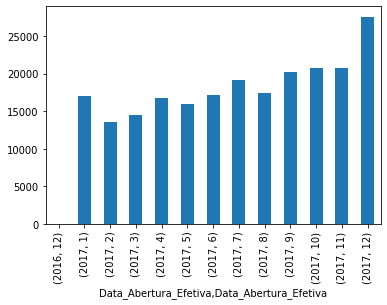

In [62]:
df = women
df["Data_Abertura_Efetiva"].groupby([df["Data_Abertura_Efetiva"].dt.year, df["Data_Abertura_Efetiva"].dt.month]).count().plot(kind="bar")

In [64]:
df["Data_Abertura_Efetiva"].groupby([df["Data_Abertura_Efetiva"].dt.year, df["Data_Abertura_Efetiva"].dt.month]).count()

Data_Abertura_Efetiva  Data_Abertura_Efetiva
2016                   12                           2
2017                   1                        17016
                       2                        13488
                       3                        14428
                       4                        16743
                       5                        15966
                       6                        17117
                       7                        19186
                       8                        17368
                       9                        20247
                       10                       20703
                       11                       20690
                       12                       27575
Name: Data_Abertura_Efetiva, dtype: int64

In [65]:
per = 27575/17016
print(per, per-1)

1.6205336154207803 0.6205336154207803


In [50]:
df = women

# df.index = df['Data_Abertura_Efetiva']
# df['Data_Abertura_Efetiva'].plot(kind='hist')
# plt.show()

fig, ax = plt.subplots()
ax.plot(df['Data_Abertura_Efetiva'], r.close)


TypeError: invalid type promotion